## Step 1

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('data_h4_3337.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


- There are 200 entries.
- No null values in any columns.

In [73]:
# How many unique values are in each column?
for column in df:
    print('Unique values in', column, df[column].nunique())

Unique values in CustomerID 200
Unique values in Gender 2
Unique values in Age 51
Unique values in Annual Income (k$) 64
Unique values in Spending Score (1-100) 84


## Step 2 (visualizations)

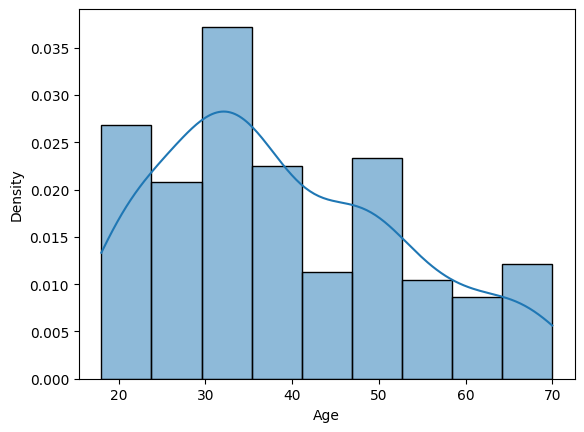

In [74]:
sns.histplot(x=df['Age'], kde=True, stat='density')
plt.show()

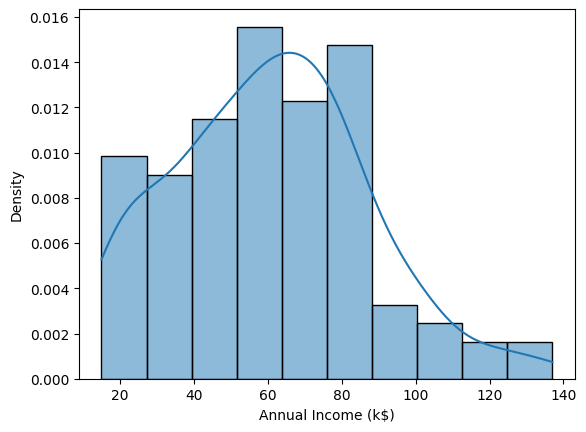

In [75]:
sns.histplot(x=df['Annual Income (k$)'], kde=True, stat='density')
plt.show()

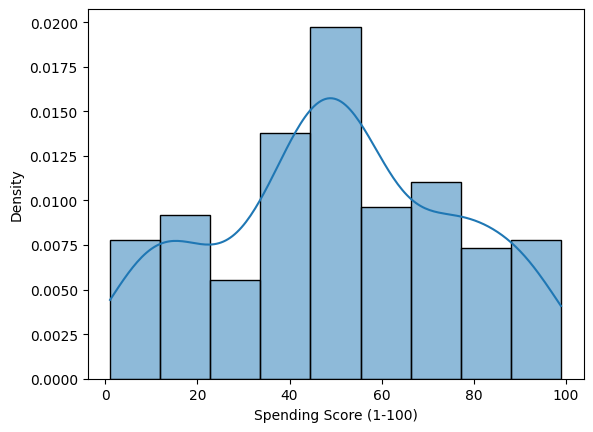

In [76]:
sns.histplot(x=df['Spending Score (1-100)'], kde=True, stat='density')
plt.show()

- Age varies drastically, with most in the range of 20 - 50
- Most people have income from 20k to 80k.
- The highest number of spending score are from 40 - 60.

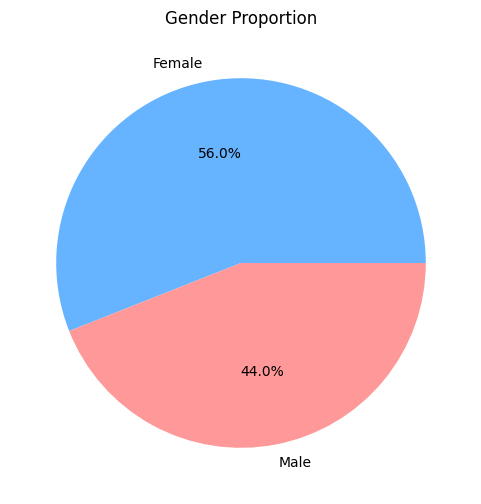

In [77]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Gender Proportion')
plt.show()


The dataset has a fairly balanced gender distribution, so gender bias in subsequent analysis should be minimal.

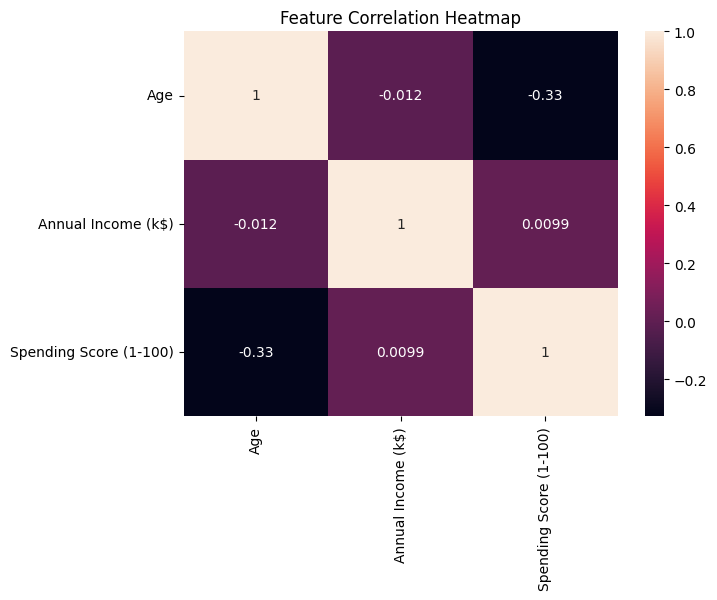

In [78]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(df.drop('CustomerID', axis=1).select_dtypes(include='number').corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()


- Features have little correlations to each other.
- No multicollinearity occured.

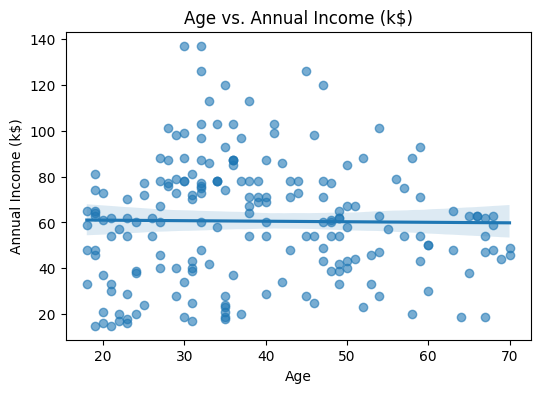

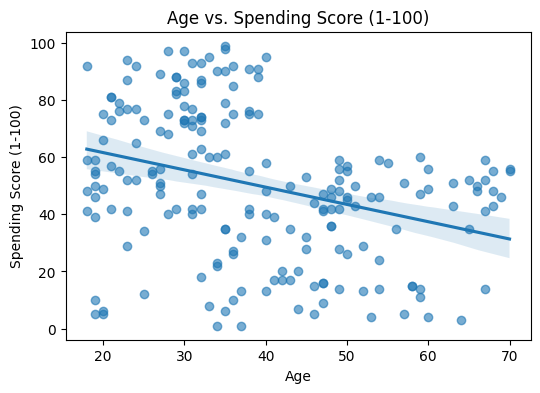

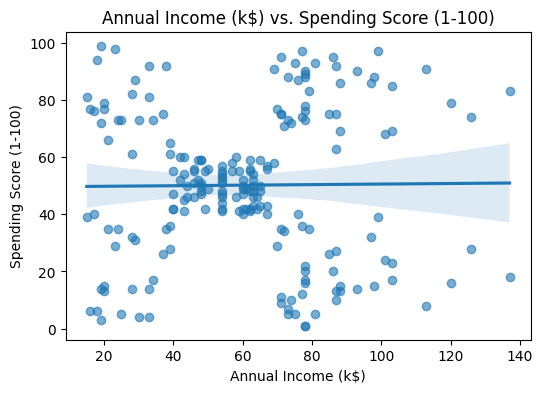

In [79]:
# Plot 1: Age vs. Annual Income (k$)
plt.figure(figsize=(6,4))
sns.regplot(x='Age', y='Annual Income (k$)', data=df, scatter_kws={'alpha':0.6})
plt.title('Age vs. Annual Income (k$)')
plt.show()

# Plot 2: Age vs. Spending Score (1-100)
plt.figure(figsize=(6,4))
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, scatter_kws={'alpha':0.6})
plt.title('Age vs. Spending Score (1-100)')
plt.show()

# Plot 3: Annual Income (k$) vs. Spending Score (1-100)
plt.figure(figsize=(6,4))
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, scatter_kws={'alpha':0.6})
plt.title('Annual Income (k$) vs. Spending Score (1-100)')
plt.show()

- Age vs. Annual Income: There is no strong linear relationship, people of all ages have a wide range of incomes.
- Age vs. Spending Score: Younger customers tend to have both high and low spending scores, while older customers are more likely to have lower spending scores.
- Annual Income vs. Spending Score: there are clusters of customers with high income and either high or low spending scores, suggesting distinct customer segments.

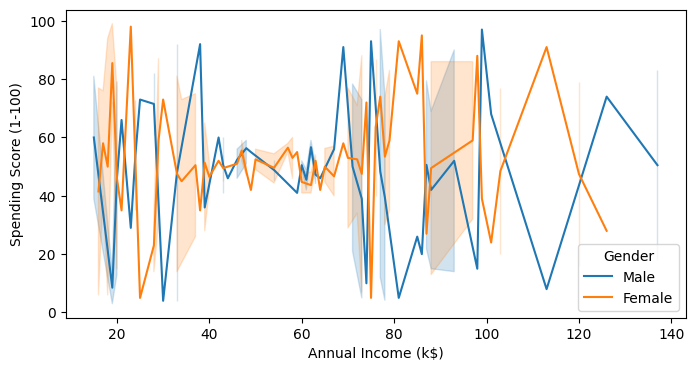

In [80]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.show()

Both genders display similar patterns; no significant gender-based difference in the relationship between income and spending score.

In [81]:
#Saving only Spending_Score and income values in to X.
X=df.iloc[:,[2,3]].values

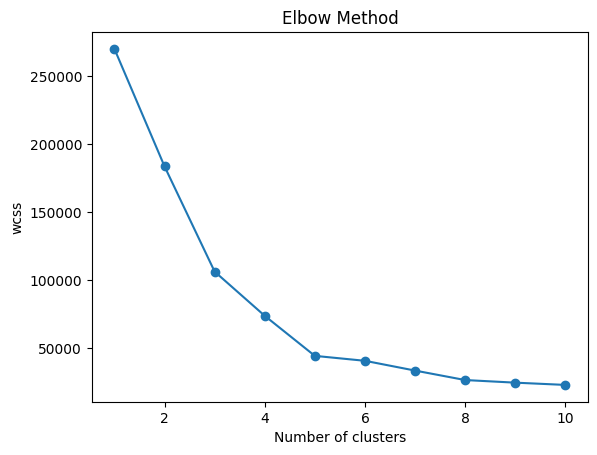

In [82]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


The best number of cluser is 5 before it gain less benefits from higher cluster.

In [83]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(X)

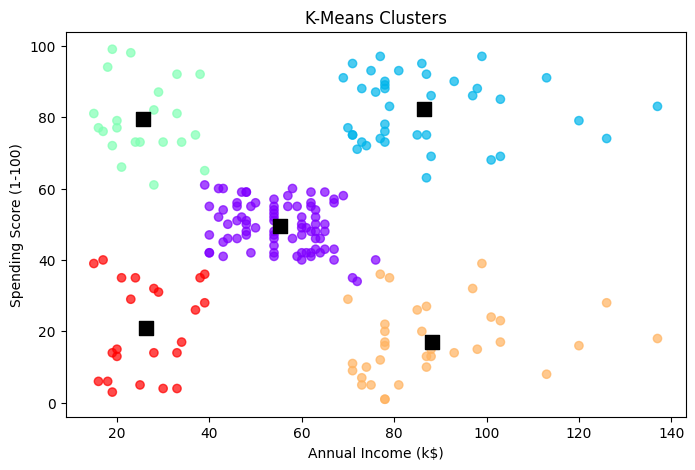

In [84]:
plt.figure(figsize=(8,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_pred, cmap='rainbow', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', marker=',')
plt.title('K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## Step 4 (Hierarchical Clustering)

In [85]:
from sklearn.preprocessing import StandardScaler, normalize

# Initialize the scaler
scaler = StandardScaler()

# Standardrize and normalize the data
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(data=X_normalized)
X_normalized.columns = ['Annual Income (k$)', 'Spending Score (1-100)']
X_normalized.head()

,Annual Income (k$),Spending Score (1-100)
0,-0.970136,-0.242563
1,-0.824010,0.566575
2,-0.703978,-0.710221
3,-0.853054,0.521823
4,-0.972792,-0.231681


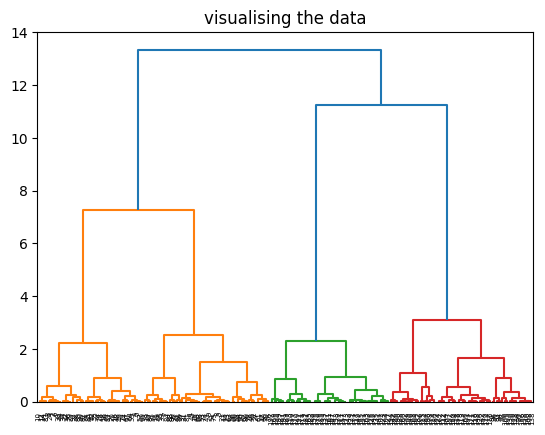

In [86]:
import scipy.cluster.hierarchy as shc
 
plt.title('visualising the data')
Dendrogram=shc.dendrogram((shc.linkage(X_normalized,method='ward')))

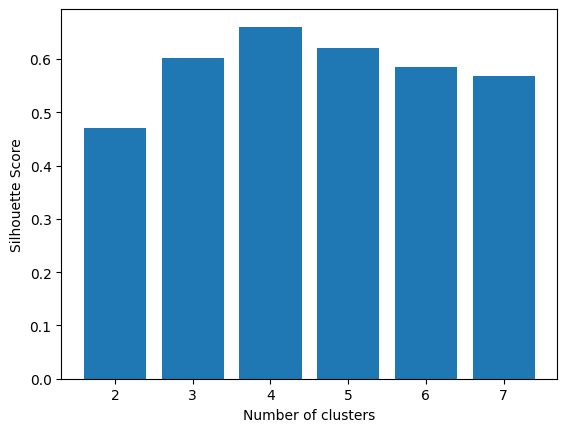

In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#wherewe'llsavescoresforlaterplotting
silhouette_scores=[]

#testingdifferentclustervaluesinrange[2,8﴿
for n_cluster in range(2,8):
    silhouette_scores.append(silhouette_score(X_normalized, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_normalized)))

#Creatingbargraphtocomparetheresults.Youcanusealineplotifyouprefer﴾similartoKMeanslab﴿
plt.bar(x=range(2,8),height=silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Best number of cluser is 4

In [88]:
#creating and fitting model
agg=AgglomerativeClustering(n_clusters=4)
agg.fit(X_normalized)

AgglomerativeClustering(n_clusters=4)

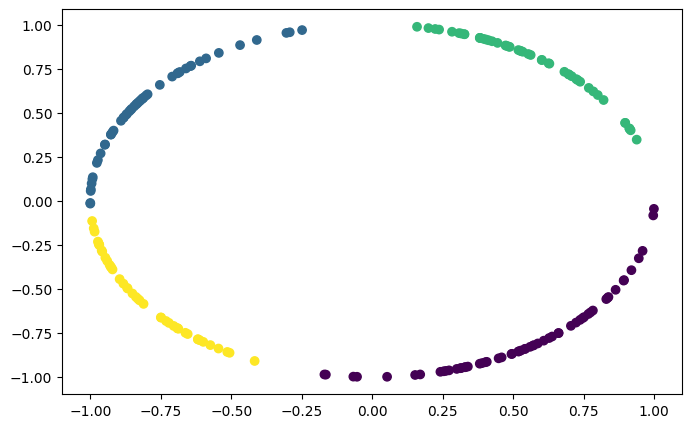

In [89]:
#Visualizing the clustering
plt.figure(figsize=(8,5))
plt.scatter(X_normalized['Annual Income (k$)'], X_normalized['Spending Score (1-100)'], c=AgglomerativeClustering(n_clusters=4).fit_predict(X_normalized))
plt.show()

## Step 5 (conclusion)


The Hierarchical Clustering have 4 clusters as the best fit for the data while the best cluster for K Mean is 5.

Hierarchical clustering (dendrogram) may combine groups that are close together, resulting in fewer clusters.
K-Means may separate these into more clusters if their centroids are distinct enough.
Additionally, hierarchical clustering provides a visual and flexible approach to choosing the number of clusters, 
while K-Means is faster but requires the number of clusters to be set in advance.